<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Mini_Project_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)

In [ ]:
print(penguins.head())

In [ ]:
print(penguins.info())


In [ ]:
# Check for missing values
print(penguins.isnull().sum())

In [ ]:
# Drop missing values only for specified columns
penguins_cleaned = penguins.dropna(subset=['body_mass_g', 'flipper_length_mm', 'bill_depth_mm', 'bill_length_mm'])

# Check the remaining missing values
print(penguins_cleaned.isnull().sum())


In [ ]:
# Checking for duplicates
print("Number of duplicate rows:", penguins.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in numerical columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for column in numerical_columns:
    outliers = detect_outliers_iqr(penguins, column)
    print("Outliers in", column, ":", outliers.shape[0])

In [ ]:
# Create a copy of the DataFrame with a different name
new_table = penguins.copy()
# Handling missing values by dropping them
new_table.dropna(inplace=True)
print(new_table.isnull().sum())

In [ ]:
new_table.head()
new_table.columns

In [ ]:
# Find unique values in the 'sex' column
unique_sex_values = new_table['sex'].unique()

# Print the unique values
print("Unique values in the 'sex' column:", unique_sex_values)

In [ ]:
# Group the data by species and sex
grouped_data = penguins_numeric.groupby(['species', 'sex'])

# Display datasets with sex, mass, and mean body mass for each species and sex
for (species, sex), group in grouped_data:
    print(f"\nSpecies: {species}, Sex: {sex}")
    # print(group[['sex', 'body_mass_g']])
    mean_mass = group['body_mass_g'].mean()
    print(f"Mean body mass: {mean_mass}")


In [ ]:
# Group the data by species
grouped_data = penguins_cleaned.groupby('species')

# Calculate the average mass values by species
average_mass_by_species = grouped_data['body_mass_g'].mean()

# Print the average mass values by species
print("Average mass values by species:")
print(average_mass_by_species)

Average mass values by species:
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


In [ ]:
# Calculate the average mass for each species
average_mass_by_species = penguins_cleaned.groupby('species')['body_mass_g'].mean()

# Iterate through the rows with missing values in the 'sex' column
for index, row in penguins_cleaned[penguins_cleaned['sex'].isnull()].iterrows():
    species = row['species']
    average_mass = average_mass_by_species.get(species)

    # Determine sex based on body mass and update the 'sex' column
    if row['body_mass_g'] >= average_mass:
        penguins_cleaned.at[index, 'sex'] = 'male'
    else:
        penguins_cleaned.at[index, 'sex'] = 'female'

# Print the updated DataFrame
print(penguins_cleaned.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [ ]:
# Print updated DataFrame
print(penguins_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 32.1+ KB
None


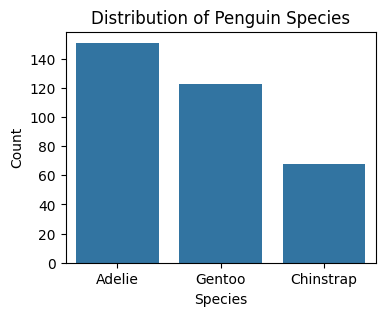

In [ ]:
# Species Distribution (Bar Chart)
plt.figure(figsize=(4, 3))
sns.countplot(x='species', data=penguins_cleaned)
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

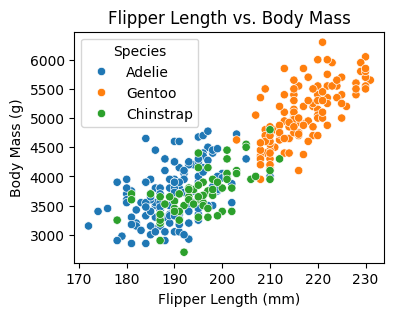

In [ ]:
# Flipper Length vs. Body Mass (Scatter Plot)
plt.figure(figsize=(4, 3))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguins_cleaned)
plt.title('Flipper Length vs. Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Species')
plt.show()

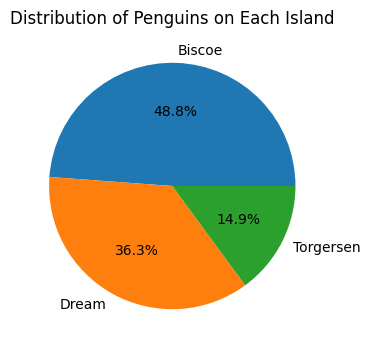

In [ ]:
# Island Distribution (Pie Chart)
plt.figure(figsize=(4, 4))
penguins_cleaned['island'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Penguins on Each Island')
plt.ylabel('')
plt.show()

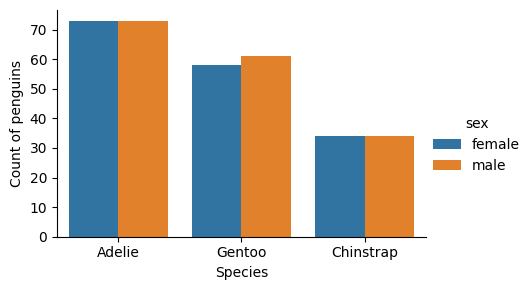

In [ ]:
# Sex Distribution within Species (Grouped Bar Charts)
g = sns.catplot(x='species', hue='sex', data=penguins, kind='count', height=3, aspect=1.5)
g.set_axis_labels('Species', 'Count of penguins')
g.set_titles('Sex Distribution within Species')
plt.show()

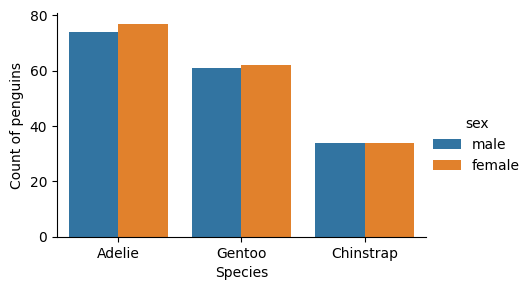

In [ ]:
# Sex Distribution within Species (Grouped Bar Charts)
g = sns.catplot(x='species', hue='sex', data=penguins_cleaned, kind='count', height=3, aspect=1.5)
g.set_axis_labels('Species', 'Count of penguins')
g.set_titles('Sex Distribution within Species')
plt.show()

In [ ]:
#We see some changes after prep data

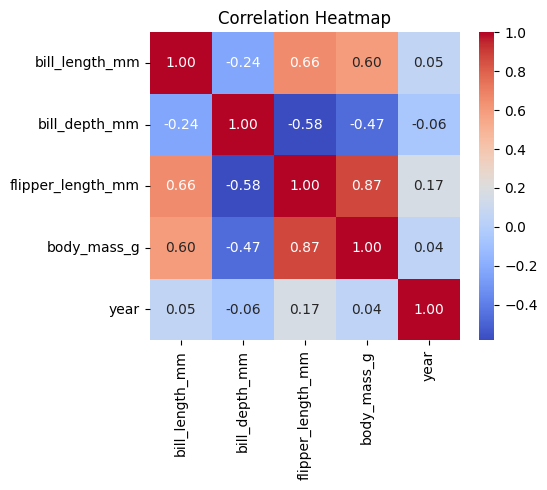

In [ ]:
# Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.
plt.figure(figsize=(5, 4))
sns.heatmap(penguins_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

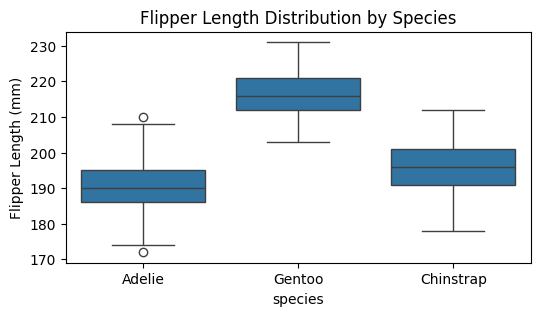

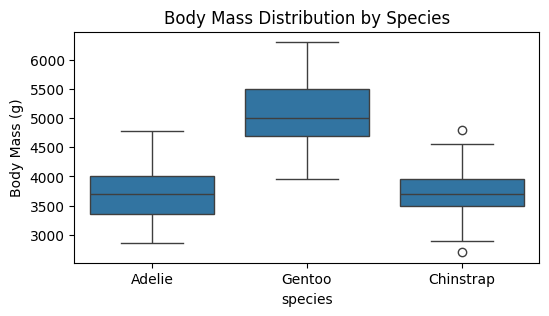

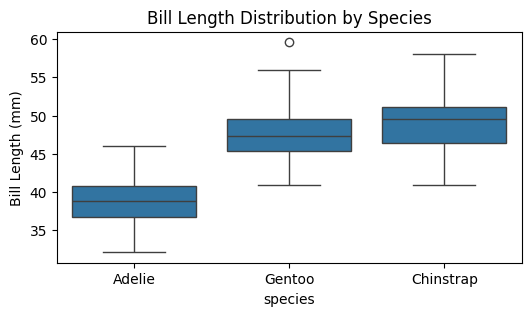

In [ ]:
# Boxplots for Measurements
plt.figure(figsize=(6, 3))
sns.boxplot(x='species', y='flipper_length_mm', data=penguins_cleaned)
plt.title('Flipper Length Distribution by Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x='species', y='body_mass_g', data=penguins_cleaned)
plt.title('Body Mass Distribution by Species')
plt.ylabel('Body Mass (g)')
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x='species', y='bill_length_mm', data=penguins_cleaned)
plt.title('Bill Length Distribution by Species')
plt.ylabel('Bill Length (mm)')
plt.show()

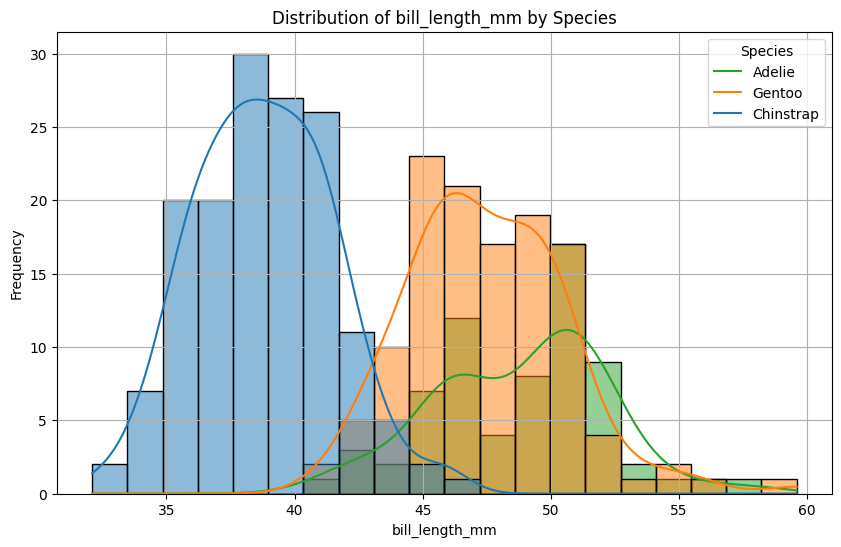

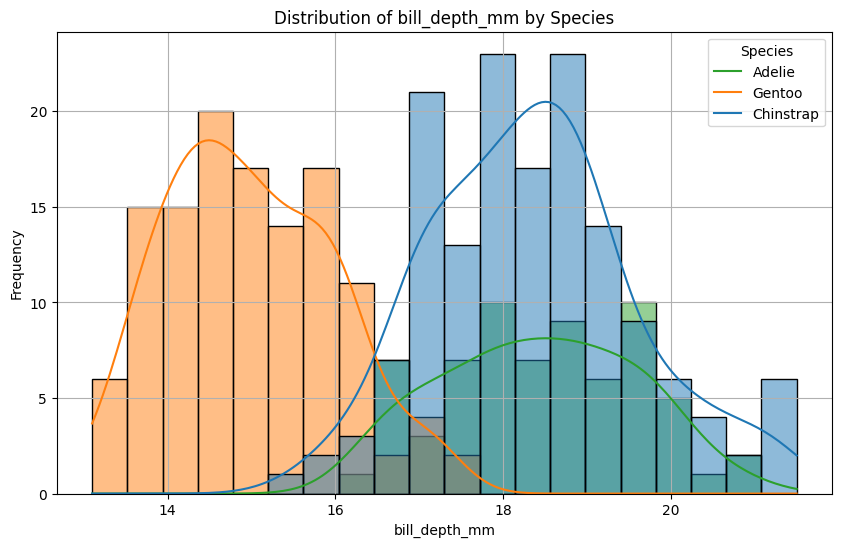

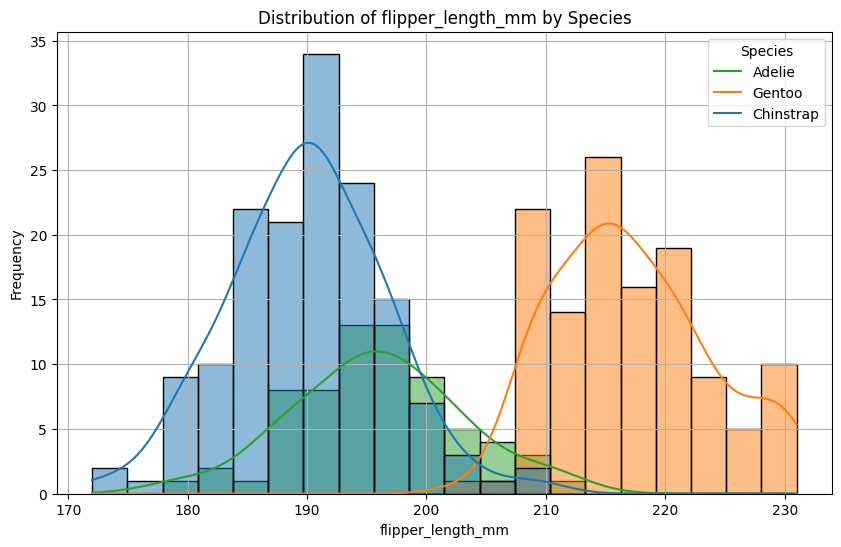

In [ ]:
# Define the key measurements
measurements = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

# Iterate over each measurement
for measurement in measurements:
    # Create a histogram for each species
    plt.figure(figsize=(10, 6))
    sns.histplot(data=penguins_cleaned, x=measurement, hue='species', bins=20, kde=True)
    plt.title(f'Distribution of {measurement} by Species')
    plt.xlabel(measurement)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend(title='Species', labels=penguins_cleaned['species'].unique())
    plt.show()

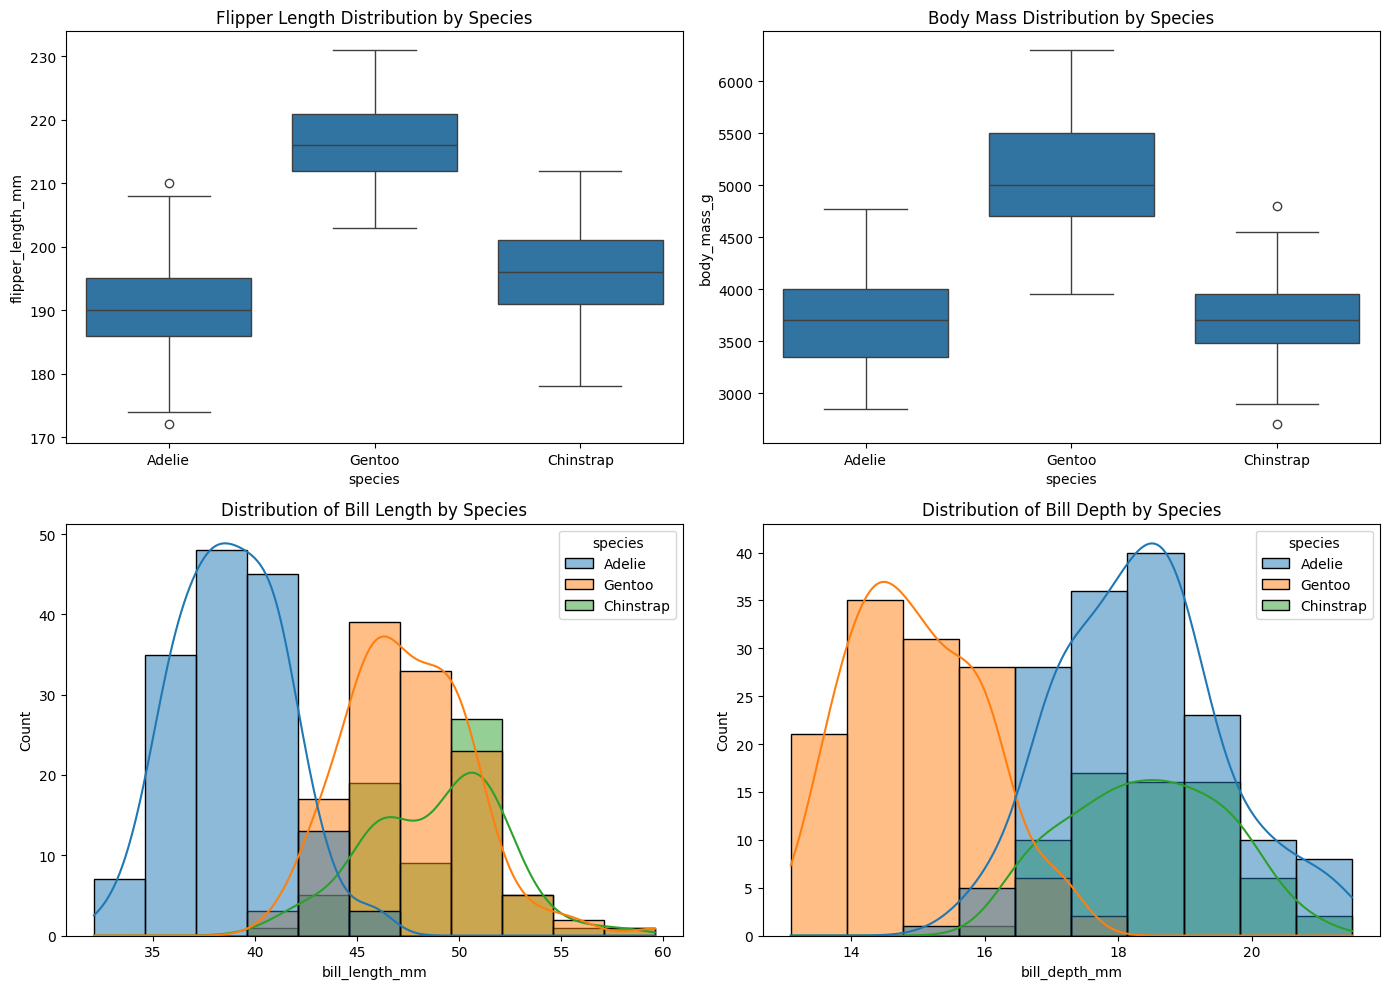

In [ ]:
# Combine multiple plots into a single figure (using subplots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='species', y='flipper_length_mm', data=penguins_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Flipper Length Distribution by Species')

sns.boxplot(x='species', y='body_mass_g', data=penguins_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Body Mass Distribution by Species')

sns.histplot(data=penguins_cleaned, x='bill_length_mm', hue='species', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Bill Length by Species')

sns.histplot(data=penguins_cleaned, x='bill_depth_mm', hue='species', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Bill Depth by Species')

plt.tight_layout()
plt.show()

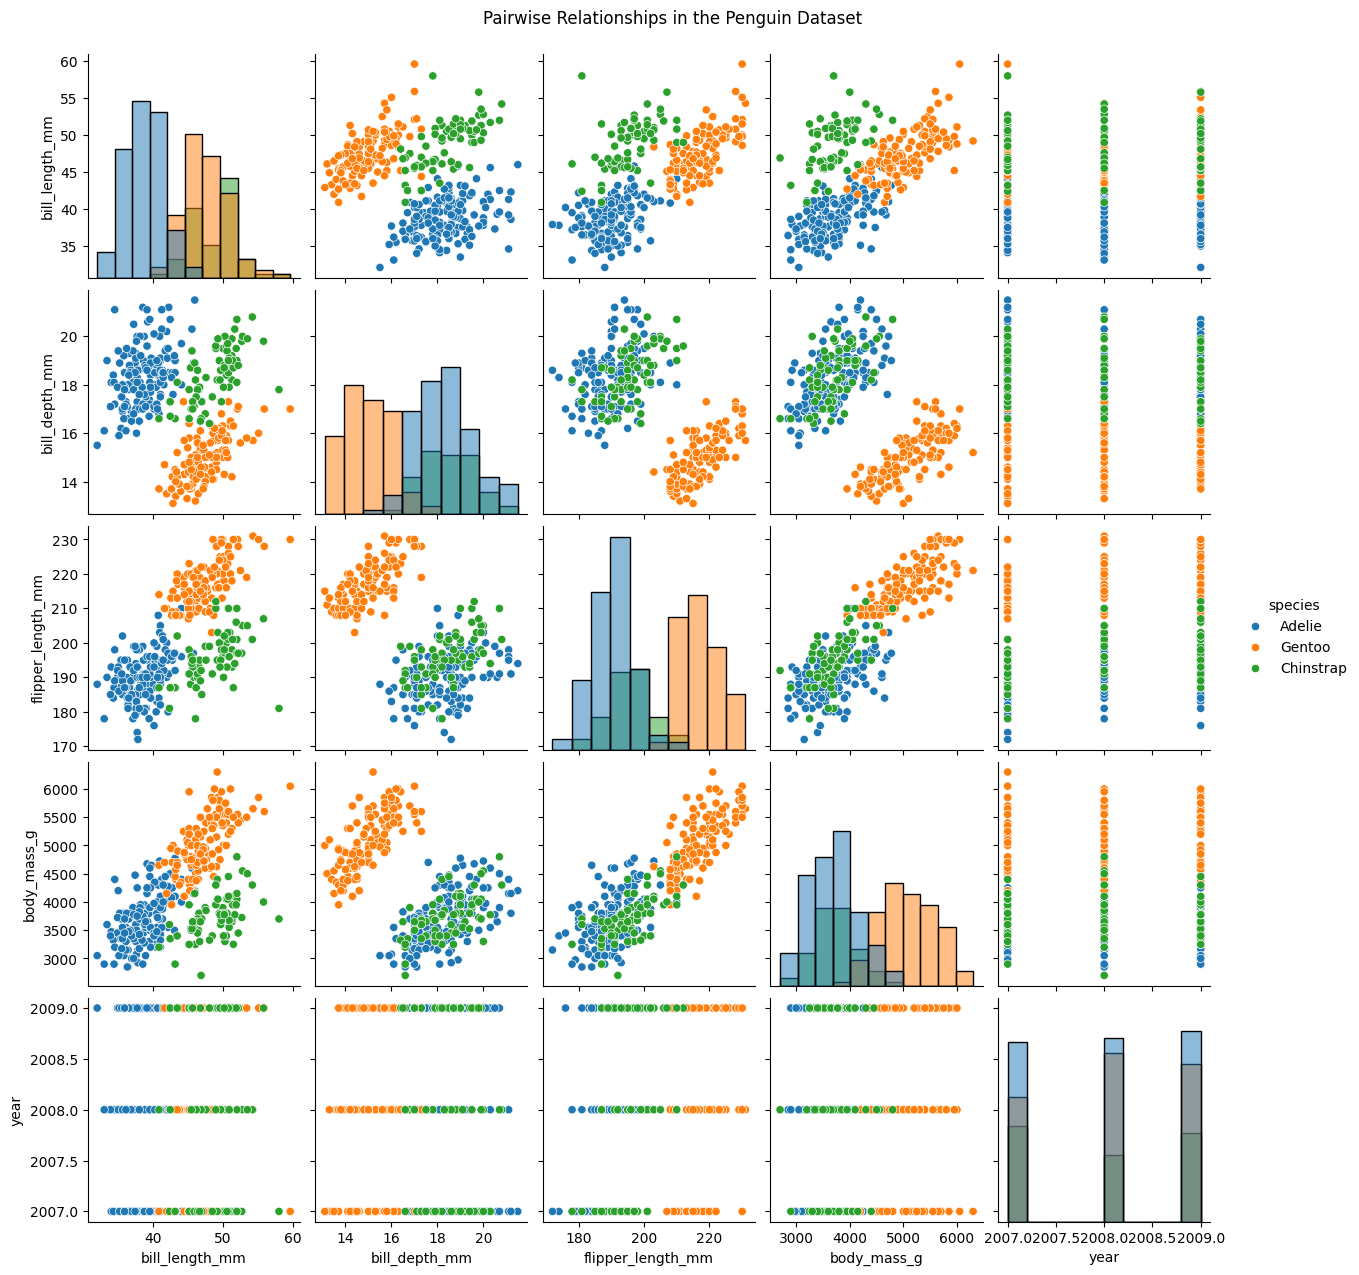

In [ ]:
# Use Seaborn’s pairplot to visualize pairwise relationships in the dataset
sns.pairplot(penguins_cleaned, hue='species', diag_kind='hist')
plt.suptitle('Pairwise Relationships in the Penguin Dataset', y=1.02)
plt.show()

In [ ]:
# Compute correlations
correlations = penguins_cleaned.corr()

# Print correlations
print(correlations)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   
year                     0.054545      -0.060354           0.169675   

                   body_mass_g      year  
bill_length_mm        0.595110  0.054545  
bill_depth_mm        -0.471916 -0.060354  
flipper_length_mm     0.871202  0.169675  
body_mass_g           1.000000  0.042209  
year                  0.042209  1.000000  


<ipython-input-169-18384d9a73ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = penguins_cleaned.corr()


The correlation matrix above shows the correlation coefficients between different numerical variables in the penguins_cleaned dataset:

bill_length_mm has a positive correlation with flipper_length_mm (0.656) and body_mass_g (0.595), indicating that as bill length increases, flipper length and body mass tend to increase as well.

bill_depth_mm has a negative correlation with flipper_length_mm (-0.584) and body_mass_g (-0.472), suggesting that as bill depth increases, flipper length and body mass tend to decrease.

flipper_length_mm has a positive correlation with body_mass_g (0.871), indicating that as flipper length increases, body mass tends to increase as well.

year does not show a strong correlation with other variables in the dataset, as all correlation coefficients are relatively small (close to 0).

These correlations provide insights into how different measurements of penguins are related to each other in the dataset.